# **In this project we are using the plant village dataset.**

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;">Exploratory Data Analysis</p>
</div>

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:17px; font-weight:bold;">Data Loading</p>
</div>

In [1]:
# import libraries
import os
import random
import numpy as np
import pandas as pd 
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

# import pytorch and torchvision libraries
import torch                     
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,WeightedRandomSampler
import torchvision
from torchvision import datasets,transforms, models
import torchvision.transforms.functional as TF
from torchvision.transforms import ToTensor
from torch.optim.lr_scheduler import ReduceLROnPlateau

!pip install -U albumentations --quiet
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Check the versions
print(torch.__version__)
print(torchvision.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.6/290.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 24.6 MB/s eta 0:00:00
2.5.1+cu121
0.20.1+cu121


In [2]:
# For reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
# set device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
# data path
path = "/kaggle/input/plantvillage-dataset/color"

# Load with image folder 
dataset = datasets.ImageFolder(path, transform=None)

# Get the class names
classes = dataset.classes
print(f"Total classes : {len(classes)}")
print(f"Total Images : {len(dataset)}")

Total classes : 38
Total Images : 54305


In [5]:
# check classes
class_names = dataset.classes
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [6]:
# check the index of classes
class_to_idx = dataset.class_to_idx
class_to_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:17px; font-weight:bold;">Count Images Per Class</p>
</div>

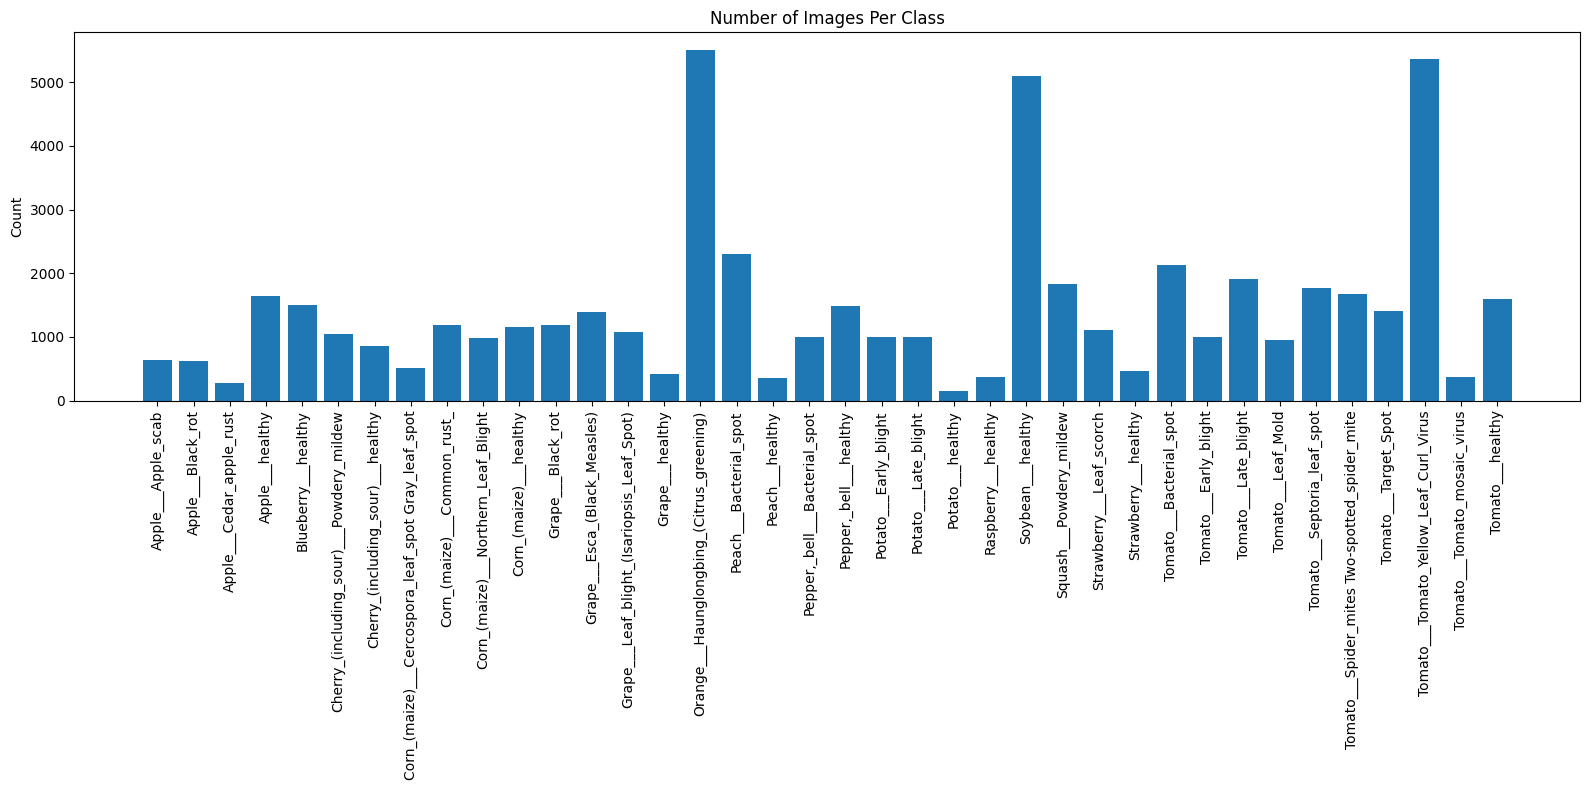

In [7]:
from collections import Counter

# Count occurrences of each label efficiently
label_counts = Counter(label for _, label in dataset)

# Map label indices to class names
class_counts = {classes[idx]: label_counts[idx] for idx in range(len(classes))}

# Visualize class distribution
plt.figure(figsize=(16, 8))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Number of Images Per Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:17px; font-weight:bold;">Visualize the Data</p>
</div>

Shape of Image :(256, 256)


Text(0.5, 1.0, 'Apple___Apple_scab')

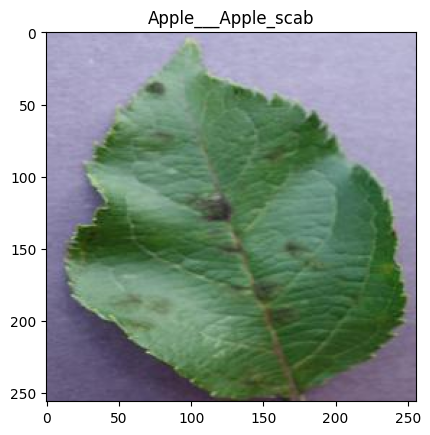

In [8]:
image , label = dataset[0]
print(f"Shape of Image :{image.size}")
plt.imshow(image)
plt.title(class_names[label])

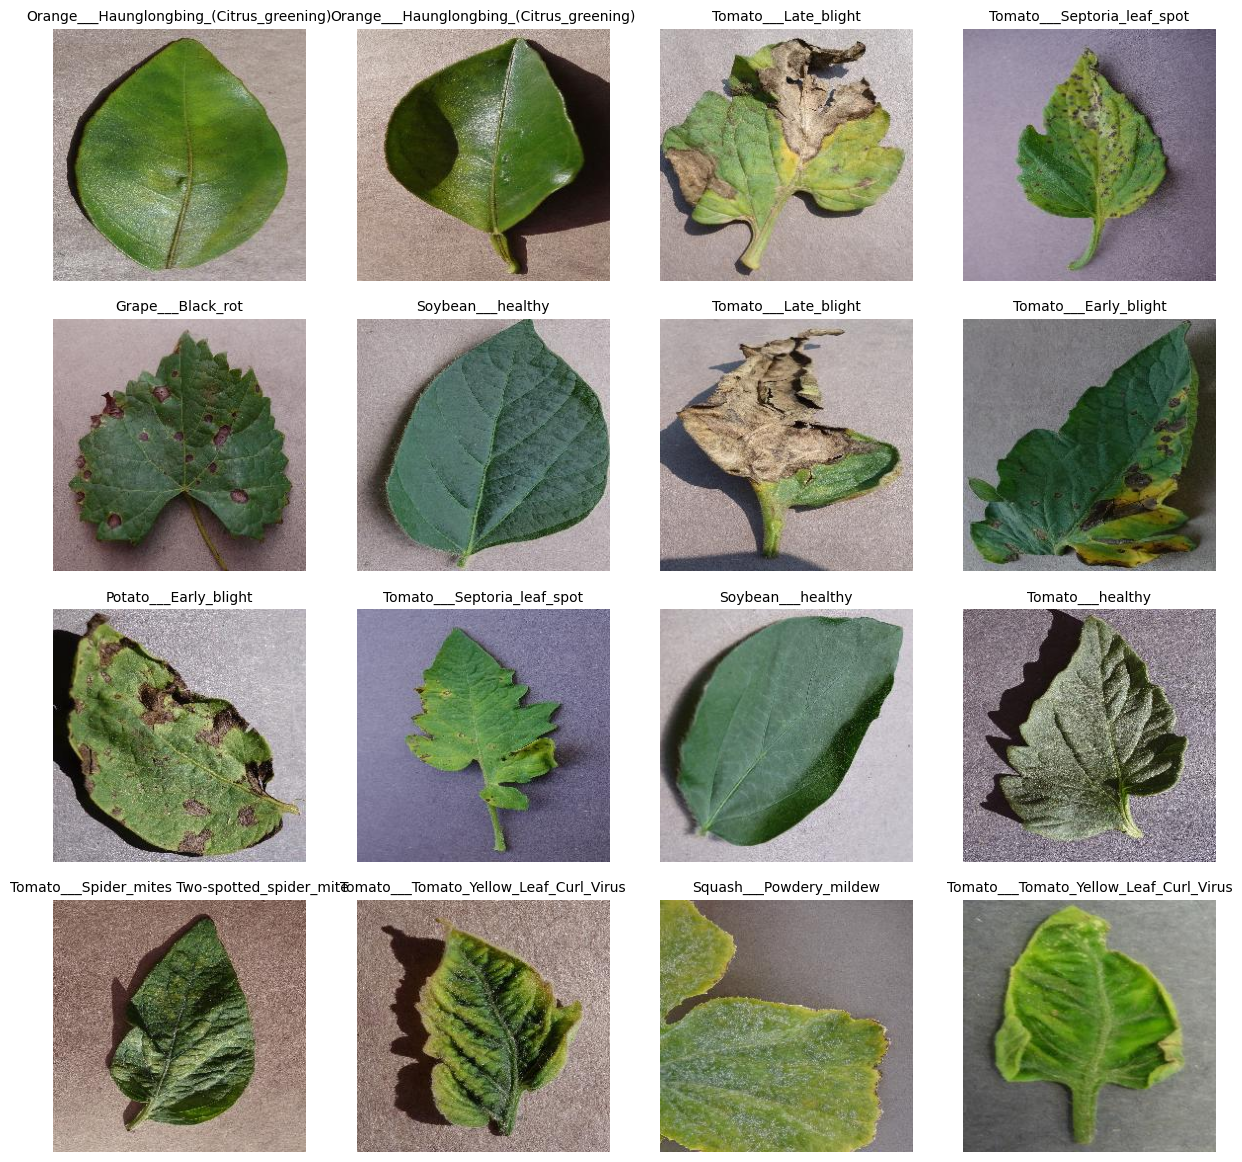

In [9]:
# plot more images
fig = plt.figure(figsize=(12,12))
row , col = 4, 4
for i in range(1, row*col+1):
    random_idx = torch.randint(0,len(dataset),size=[1]).item()
    img , label = dataset[random_idx]
    fig.add_subplot(row,col,i)
    plt.imshow(img)
    plt.title(class_names[label], fontsize=10)# Reduce title size to avoid the overlaping
    plt.tight_layout()
    plt.axis(False);

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:17px; font-weight:bold;">Analyze the image size </p>
</div>

  0%|          | 0/100 [00:00<?, ?it/s]

Avarage height: 256.00 px
Avarage width: 256.00 px
Min height: 256 px
Max height: 256 px
Min width: 256 px
Max width: 256 px


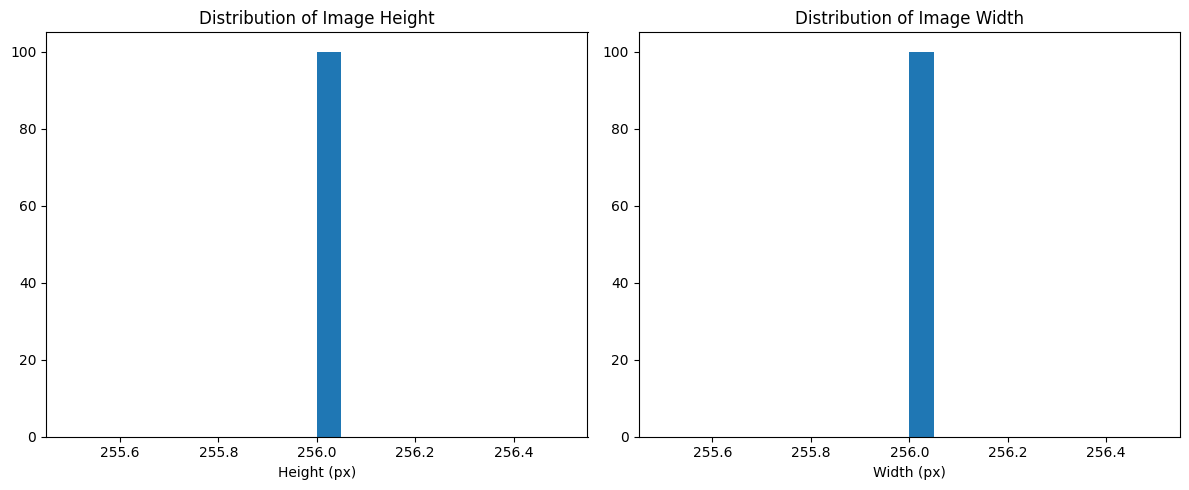

In [10]:
def analyze_image_size(dataset, samples=100):
    heights=[]
    widths=[]
    
    # randomly sample image from dataset
    indices = random.sample(range(len(dataset)),min(samples,len(dataset)))
    for idx in tqdm(indices):
        img,_ = dataset[idx]
        
        if isinstance(img, torch.Tensor):
            height, width = img.shape[1],img.shape[2]
        else: # PIL image
            width,height = img.size
            
        heights.append(height)
        widths.append(width)
        
    print(f"Avarage height: {np.mean(heights):.2f} px")
    print(f"Avarage width: {np.mean(widths):.2f} px")
    print(f"Min height: {min(heights)} px")
    print(f"Max height: {max(heights)} px")
    print(f"Min width: {min(widths)} px")
    print(f"Max width: {max(widths)} px")
    
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    plt.hist(heights,bins=20)
    plt.title("Distribution of Image Height")
    plt.xlabel("Height (px)")
    
    plt.subplot(1,2,2)
    plt.hist(widths, bins=20)
    plt.title("Distribution of Image Width")
    plt.xlabel("Width (px)")
    
    plt.tight_layout()
    plt.show();

# Analyze the image size
analyze_image_size(dataset)

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;">Data Preparation</p>
</div>

In [11]:
# Custom dataset class for applying transformations to subsets
class AlbumentationsDataset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
        self.targets = [label for _, label in self.subset]
        
    def __getitem__(self, idx):
        # Get raw PIL Image and target from the subset
        image, target = self.subset[idx]
        
        if self.transform is not None:
            # Convert PIL Image to numpy array and apply transformations
            image_np = np.array(image)
            transformed = self.transform(image=image_np)
            image = transformed["image"]
            
        return image, target
    
    def __len__(self):
        return len(self.subset)

In [12]:
train_transform = A.Compose([
    A.Resize(height=224, width=224),
    
    # Tone down brightness/contrast variations
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    
    # More selective blur/noise (less frequent)
    A.OneOf([
        A.GaussianBlur(blur_limit=5),
        A.GaussNoise(var_limit=(10, 30), p=0.3),
    ], p=0.2),
    
    # Keep geometric transformations which are valuable for plant images
    A.OneOf([
        A.RandomRotate90(),
        A.HorizontalFlip(),
        A.VerticalFlip(),
    ], p=0.5),
    
    # Reduce dropout frequency
    A.CoarseDropout(max_holes=8, max_height=20, max_width=20, p=0.2),
    
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

test_val_transform = A.Compose([
    A.Resize(height=224, width=224),
    A.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

In [13]:
# Load the dataset (original dataset as org_dataset)
base_dataset = datasets.ImageFolder(root=path)

In [14]:
# Get mapping from class name to index
class_to_idx = base_dataset.class_to_idx

# Reverse the mapping to get index to class name
idx_to_class = {v: k for k, v in class_to_idx.items()}

In [15]:
# Split the dataset into train, validation, and test indices
# Split the dataset in to train(70%) test+val(30%) split
from sklearn.model_selection import train_test_split

total_count = len(base_dataset)
train_idx, temp_idx = train_test_split(
    list(range(total_count)),
    test_size=0.3,
    random_state=SEED,
    stratify=[label for _, label in base_dataset.samples]
)

# Split Temp(30%) into test(15%) and val(15%) set
val_idx, test_idx = train_test_split(
    temp_idx,
    test_size=0.5,
    random_state=SEED,
    stratify=[base_dataset.samples[i][1] for i in temp_idx])
                                     
# Create subset of Dataset
from torch.utils.data import Subset

train_subset = Subset(base_dataset,train_idx)
val_subset = Subset(base_dataset,val_idx)
test_subset = Subset(base_dataset,test_idx)

In [16]:
# 4. Create transformed datasets from subsets
train_dataset = AlbumentationsDataset(train_subset,transform=train_transform)
val_dataset = AlbumentationsDataset(val_subset,transform=test_val_transform)
test_dataset = AlbumentationsDataset(test_subset,transform=test_val_transform)

In [17]:
# Implement class weighting for imbalanced data
class_counts = {}
for _,label in train_dataset:
    if label not in class_counts:
        class_counts[label]=0
    class_counts[label]+=1

# Calculate weights for each sample
weights =[]
for _,label in train_dataset:
    weight = 1.0 / class_counts[label]
    weights.append(weight)

# Create weighted sampeler
sampler = WeightedRandomSampler(weights,len(weights),replacement=True)

In [18]:
# 6. Create DataLoaders

BATCH_SIZE = 64

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler,  # Use WeightedRandomSampler instead of shuffle=True
    num_workers=4,
    persistent_workers=True,
    prefetch_factor=2,
    pin_memory=True
)
val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4,
    persistent_workers=True,
    prefetch_factor=2,
    pin_memory=True
)
test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4,
    persistent_workers=True,
    prefetch_factor=2,
    pin_memory=True
)

In [19]:
# Verify dataset sizes and class distribution
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Class counts in training set: {class_counts}")

Training dataset size: 38013
Validation dataset size: 8146
Test dataset size: 8146
Class counts in training set: {2: 193, 23: 260, 30: 1336, 20: 700, 10: 813, 9: 690, 33: 1173, 11: 826, 6: 598, 4: 1051, 16: 1608, 15: 3855, 37: 1114, 8: 834, 12: 968, 25: 1284, 3: 1152, 13: 753, 26: 776, 28: 1489, 35: 3750, 24: 3563, 19: 1035, 5: 736, 32: 1240, 21: 700, 31: 666, 17: 252, 1: 435, 0: 441, 36: 261, 7: 359, 34: 983, 27: 319, 18: 698, 14: 296, 29: 700, 22: 106}


<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;">Model Definition</p>
</div>

In [20]:
# Enhanced model with MixUp data augmentation
class EfficientNetWithMixup(nn.Module):
    def __init__(self,num_classes):
        super(EfficientNetWithMixup,self).__init__()
        # Load Pretrained EfficientNet-B0
        self.backbone = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
        in_features = self.backbone.classifier[1].in_features
        self.backbone.classifier[1] = nn.Linear(in_features,num_classes)

    def forward(self,x,targets=None,mixup_alpha=0.1,training=True):
        if training and mixup_alpha > 0:
            # Apply mixup only during training
            lam = np.random.beta(mixup_alpha,mixup_alpha)
            batch_size = x.size(0)
            index = torch.randperm(batch_size).to(x.device)

            mixed_x = lam * x + (1-lam)*x[index]
            y_a, y_b = targets, targets[index]

            outputs = self.backbone(mixed_x)
            return outputs, y_a,y_b,lam
        else:
            # Regular inference
            outputs = self.backbone(x)
            return outputs

In [21]:
# Custom loss function for mixup
def mixup_loss(loss_fn,pred,y_a,y_b,lam):
    return lam* loss_fn(pred,y_a) + (1-lam)*loss_fn(pred,y_b)

In [22]:
from collections import Counter

# Get class counts in the full dataset
full_class_counts = Counter([label for _, label in base_dataset.samples])

# Get class counts in the train dataset
train_class_counts = Counter([base_dataset.samples[i][1] for i in train_idx])

# Identify missing classes
missing_classes = [cls for cls in full_class_counts if cls not in train_class_counts]

if missing_classes:
    print("⚠️ Warning! The following classes are missing in the training data:", 
          [base_dataset.classes[i] for i in missing_classes])
else:
    print("✅ All classes are present in the training data!")

✅ All classes are present in the training data!


In [23]:
# Initialize model
num_classes = len(base_dataset.classes)
model = EfficientNetWithMixup(num_classes).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 133MB/s] 


<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;">Define the Loss Function and Optimizer </p>
</div>

In [24]:
# Loss function and optimizer with gradient clipping

loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)
# Improve optimizer settings
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-3)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.4, patience=2, verbose=True)

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;">Training and Evaluation Functions </p>
</div>

In [25]:
from tqdm.auto import tqdm

# Training function with mixup and tqdm progress bar
def train_model(model, train_loader, loss_fn, optimizer, device, mixup_alpha=0.2):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    loop = tqdm(train_loader, desc="Training", leave=False)
    
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass with mixup
        outputs, targets_a, targets_b, lam = model(inputs, labels, mixup_alpha=mixup_alpha, training=True)
        
        # Calculate loss with mixup
        loss = mixup_loss(loss_fn, outputs, targets_a, targets_b, lam)
        
        # Backward pass and optimize
        loss.backward()
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        # Statistics (approximate for mixup)
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (lam * predicted.eq(targets_a).sum().float() + 
                   (1 - lam) * predicted.eq(targets_b).sum().float()).item()
        
        # Update tqdm progress bar
        loop.set_postfix(loss=loss.item(), acc=correct / total)
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    
    return epoch_loss, epoch_acc

In [26]:
from tqdm.auto import tqdm

# Evaluation function with tqdm progress bar
def evaluate(model, data_loader, loss_fn, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    
    loop = tqdm(data_loader, desc="Evaluating", leave=False)
    
    with torch.no_grad():
        for inputs, labels in loop:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass (no mixup during evaluation)
            outputs = model(inputs, training=False)
            loss = loss_fn(outputs, labels)
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # Update tqdm progress bar
            loop.set_postfix(loss=loss.item(), acc=correct / total)
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    
    return epoch_loss, epoch_acc, all_preds, all_labels

In [27]:
from tqdm.auto import tqdm
import torch

# Training loop with early stopping and minimal model checkpointing
def train_and_evaluate(model, train_loader, val_loader, loss_fn, optimizer, scheduler, 
                      num_epochs=15, patience=5, mixup_alpha=0.2):
    best_val_acc = 0.0
    patience_counter = 0
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []
    
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        
        # Train the model
        train_loss, train_acc = train_model(model, train_loader, loss_fn, optimizer, device, mixup_alpha)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Validate the model
        val_loss, val_acc, _, _ = evaluate(model, val_loader, loss_fn, device)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        # Step the scheduler
        scheduler.step(val_loss)
        
        # Print statistics
        print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | " 
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc*100:.2f}%")
        
        # Save best model (only model weights)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_plant_vision_model.pth')
            print(f"✅ Saved new best model with validation accuracy: {val_acc*100:.2f}%")
            patience_counter = 0
        else:
            patience_counter += 1
        
        # Early stopping
        if patience_counter >= patience:
            print(f"⏹️ Early stopping triggered after {epoch+1} epochs!")
            break
    
    return train_losses, train_accs, val_losses, val_accs

In [28]:
# Train the model
train_losses, train_accs, val_losses, val_accs = train_and_evaluate(
    model, train_loader, val_loader, loss_fn, optimizer, scheduler, 
    num_epochs=10, patience=5, mixup_alpha=0.1
)


Epoch 1/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 1.2231 | Train Acc: 85.63% | Val Loss: 0.7307 | Val Acc: 98.96%
✅ Saved new best model with validation accuracy: 98.96%

Epoch 2/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 1.0078 | Train Acc: 91.61% | Val Loss: 0.7134 | Val Acc: 99.32%
✅ Saved new best model with validation accuracy: 99.32%

Epoch 3/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 1.0109 | Train Acc: 91.16% | Val Loss: 0.7068 | Val Acc: 99.35%
✅ Saved new best model with validation accuracy: 99.35%

Epoch 4/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 0.9740 | Train Acc: 92.04% | Val Loss: 0.7094 | Val Acc: 99.61%
✅ Saved new best model with validation accuracy: 99.61%

Epoch 5/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 0.9357 | Train Acc: 93.05% | Val Loss: 0.7205 | Val Acc: 99.13%

Epoch 6/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 0.9320 | Train Acc: 93.10% | Val Loss: 0.7045 | Val Acc: 99.52%

Epoch 7/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 0.8934 | Train Acc: 94.13% | Val Loss: 0.7046 | Val Acc: 99.63%
✅ Saved new best model with validation accuracy: 99.63%

Epoch 8/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 0.9338 | Train Acc: 92.74% | Val Loss: 0.6993 | Val Acc: 99.66%
✅ Saved new best model with validation accuracy: 99.66%

Epoch 9/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 0.9522 | Train Acc: 92.03% | Val Loss: 0.6927 | Val Acc: 99.64%

Epoch 10/10


Training:   0%|          | 0/594 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]

Train Loss: 0.8890 | Train Acc: 94.03% | Val Loss: 0.6884 | Val Acc: 99.68%
✅ Saved new best model with validation accuracy: 99.68%


**Note:** **Here our train accuracy is lower than the test or validation is because of heavy augmentation on train data which is not consern.**

In [29]:
train_indices = set(train_idx)
val_indices = set(val_idx)
print(f"Overlap: {len(train_indices.intersection(val_indices))}")  # Should be 0

Overlap: 0


<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;">Loading and Evaluating on Test Data </p>
</div>

In [30]:
# Load best model
model.load_state_dict(torch.load('best_plant_vision_model.pth', weights_only=True))

<All keys matched successfully>

In [31]:
# Evaluate on the test data
test_loss, test_acc, test_preds, test_labels = evaluate(model, test_loader, loss_fn, device)
print(f"\nTest Loss: {test_loss:.4f} | Test acc:{test_acc*100:.2f}%")

Evaluating:   0%|          | 0/128 [00:00<?, ?it/s]


Test Loss: 0.6895 | Test acc:99.73%


<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;"> Visualization and Analysis</p>
</div>

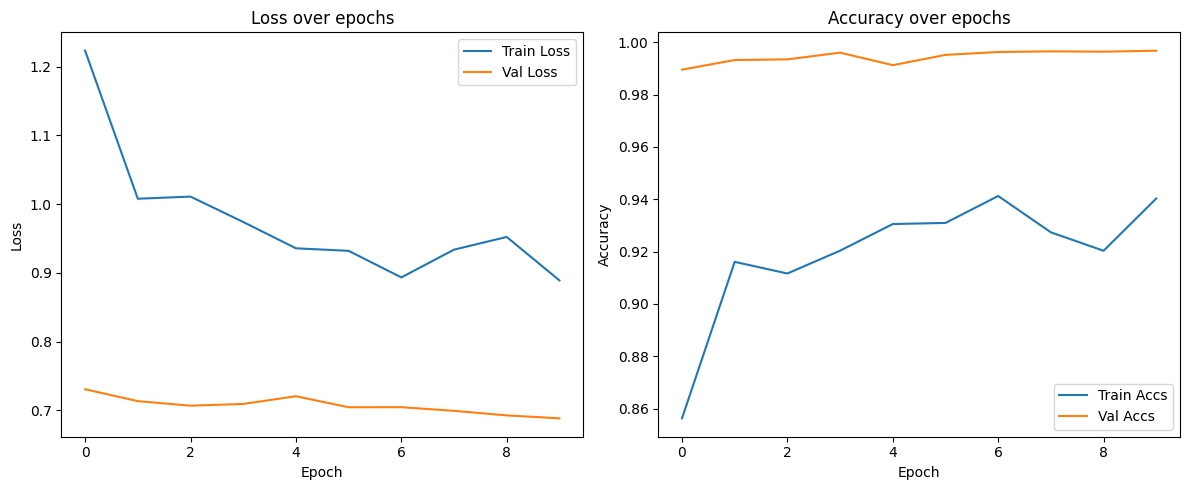

In [32]:
# Plot training and validation metrics
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Accs')
plt.plot(val_accs, label='Val Accs')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show();

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;"> Confusion Matrix  </p>
</div>

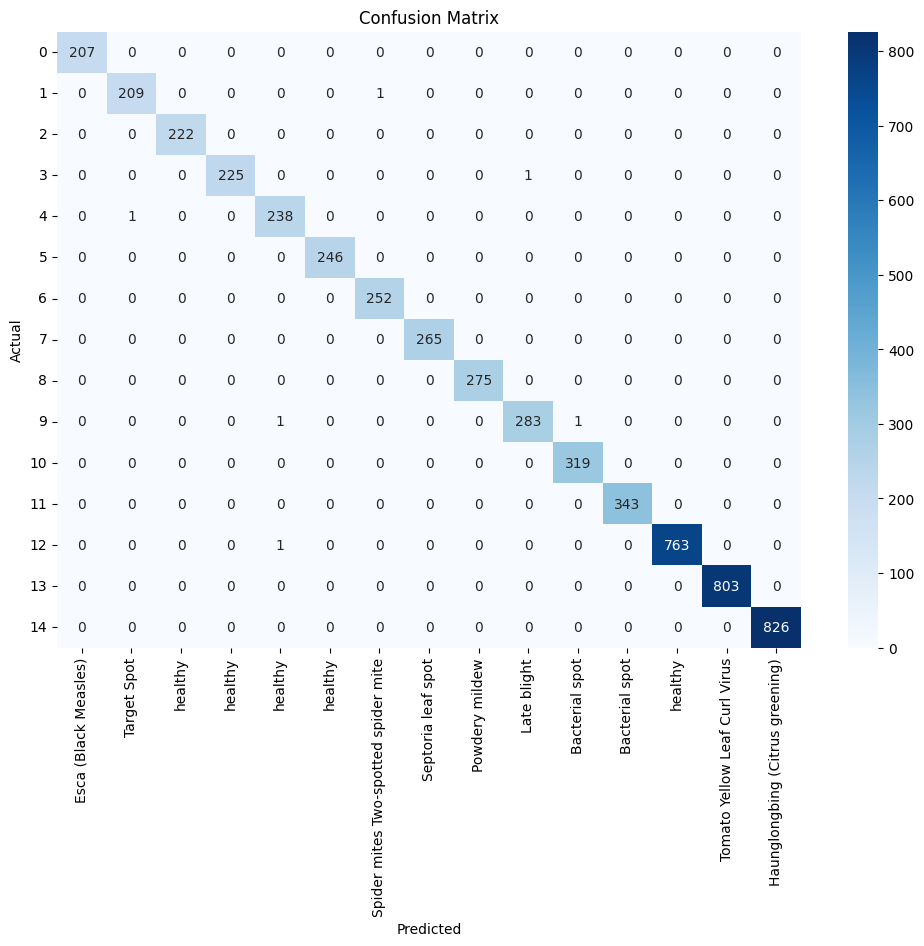

In [33]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels,test_preds)

# Our class names are too long so shorten them
class_display_names = [c.split('___')[-1].replace('_',' ') for c in class_names]

# We have 38 total classes and ploting all will make hard to read & size of matrix will increase
# We will take 15 classes

if len(class_names)>15:
    # Find the most frequent classes 
    unique , counts = np.unique(test_labels, return_counts = True)# this will Returns class labels (unique) and their frequencies (counts)
    top_indices = np.argsort(counts)[-15:]
    top_classes = unique[top_indices]

    # filter label & prediction because we want only labels which belongs to that top 15 classes
    mask = np.isin(test_labels, top_classes)
    filtered_labels, filtered_preds = np.array(test_labels)[mask], np.array(test_preds)[mask]

    # Compute reduced confusuion matrix
    cm = confusion_matrix(filtered_labels, filtered_preds, labels= top_classes)
    class_display_names = [class_display_names[i] for i in top_classes ]

# Plot the confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',xticklabels=class_display_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;"> Classification Report  </p>
</div>

In [34]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_preds,
                            target_names = class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00        94
                                 Apple___Black_rot       1.00      1.00      1.00        93
                          Apple___Cedar_apple_rust       1.00      1.00      1.00        41
                                   Apple___healthy       1.00      1.00      1.00       246
                               Blueberry___healthy       1.00      1.00      1.00       226
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       158
                 Cherry_(including_sour)___healthy       1.00      0.99      1.00       128
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      1.00      0.94        77
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       179
               Corn_(maize)___Northern_Leaf_Blight       1.00      0.94      0.

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px;">
    <p style="font-size:20px; font-weight:bold;">Inference Function for Single Images</p>
</div>

In [35]:
def predict_disease(model, image_path, idx_to_class, device):
    from PIL import UnidentifiedImageError

    try:
        # Load and preprocess the image
        image = Image.open(image_path).convert('RGB')
    except FileNotFoundError:
        print(f"❌ File not found: {image_path}")
        return
    except UnidentifiedImageError:
        print(f"❌ Cannot identify image file: {image_path}")
        return

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Set model to eval mode
    model.eval()

    # Make predictions
    with torch.no_grad():
        try:
            raw_outputs = model(image_tensor, training=False)  # Updated to ensure safe forward call
        except TypeError:
            raw_outputs = model(image_tensor)  # fallback if model doesn't accept 'training' kwarg

        probs = torch.nn.functional.softmax(raw_outputs, dim=1)[0]

    # Get top 3 predictions
    top3_probs, top3_indices = torch.topk(probs, 3)

    # Plot the input image and top predictions
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Input Image')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    y_pos = np.arange(3)
    class_name_display = [idx_to_class[i.item()].split('___')[-1].replace('_', ' ') for i in top3_indices]
    plt.barh(y_pos, top3_probs.cpu().numpy() * 100)
    plt.yticks(y_pos, class_name_display)
    plt.xlabel('Probability (%)')
    plt.title('Top 3 Predictions')
    plt.tight_layout()
    plt.show()

    # Print top prediction
    best_prob, best_idx = top3_probs[0], top3_indices[0]
    best_class_name = idx_to_class[best_idx.item()]
    print(f"\n🎯 Prediction: {best_class_name} - {best_prob.item() * 100:.2f}%")

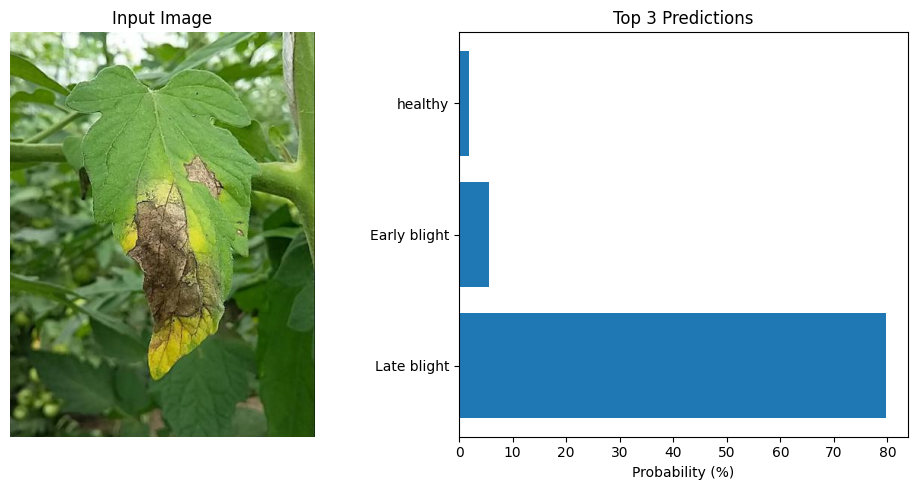


🎯 Prediction: Tomato___Late_blight - 79.79%


In [36]:
predict_disease(model, '/kaggle/input/test-data/tomato late blight.jpg', idx_to_class, device)

In [37]:
import os
print(os.listdir())

['__notebook__.ipynb', 'best_plant_vision_model.pth']
